In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
mdata=Base.classes.measurement
sdata=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

C:\Users\rwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


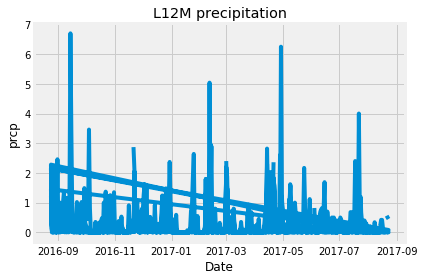

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
stmt=session.query(mdata,sdata.name,sdata.latitude,sdata.longitude,sdata.elevation).statement
results= pd.read_sql_query(stmt, session.bind)
data=results[["station","date","prcp","tobs","name","latitude","longitude","elevation"]]
data["date"]=data["date"].apply(pd.to_datetime)
dti=data["date"].max()
# Calculate the date 1 year ago from the last data point in the database
LY=dti-pd.Timedelta('365 day')
L12Mdata=data[(data["date"]>LY)]
fig, ax1 = plt.subplots()
ax1.plot(L12Mdata["date"],L12Mdata["prcp"])
ax1.set_xlabel("Date")
ax1.set_ylabel("prcp")
ax1.set_title("L12M precipitation")
fig.tight_layout()
plt.show()

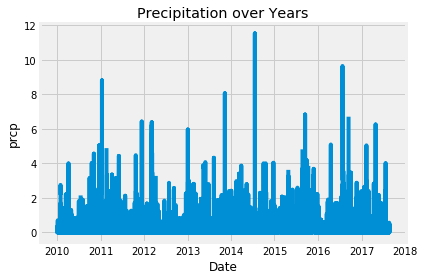

In [11]:
# Perform a query to retrieve the data and precipitation scores
stmt_p=session.query(mdata.prcp,mdata.date).statement
# # Save the query results as a Pandas DataFrame and set the index to the date column
datap= pd.read_sql_query(stmt_p, session.bind)
datap["date"]=datap["date"].apply(pd.to_datetime)
# Sort the dataframe by date
sresult=datap.sort_values(by="date")
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax2 = plt.subplots()
ax2.plot(sresult["date"],sresult["prcp"])
ax2.set_xlabel("Date")
ax2.set_ylabel("prcp")
ax2.set_title("Precipitation over Years")
fig.tight_layout()
plt.show()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
datap.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [42]:
# Design a query to show how many stations are available in this dataset?
data['name'].nunique()

9

In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data.groupby(["station"])["date"].count().reset_index(name="count").sort_values(['count'],ascending=False)

,station,count
6,USC00519281,24948
7,USC00519397,24516
1,USC00513117,24381
8,USC00519523,24021
3,USC00516128,23508
2,USC00514830,19818
0,USC00511918,17811
4,USC00517948,12348
5,USC00518838,4599


In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
h_temp=max(data["tobs"][data["station"]=="USC00519281"])
l_temp=min(data["tobs"][data["station"]=="USC00519281"])
print(f"""the lowest temperature recorded for most active station is : {l_temp}\nthe highest temperature recorded for most active station is : {h_tmep}""")

the lowest temperature recorded for most active station is : 54.0
the highest temperature recorded for most active station is : 85.0


In [66]:
# Choose the station with the highest number of temperature observations.
data.groupby(["station"])["tobs"].mean().reset_index(name="Avg_Temp").sort_values(['Avg_Temp'],ascending=False)

,station,Highest_Temp
2,USC00514830,74.873297
4,USC00517948,74.684402
7,USC00519397,74.553231
8,USC00519523,74.543649
5,USC00518838,72.724070
1,USC00513117,72.689184
6,USC00519281,71.663781
0,USC00511918,71.615968
3,USC00516128,70.915008


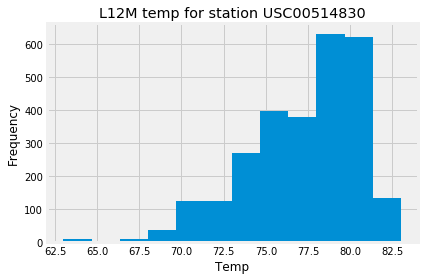

In [79]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig, ax3 = plt.subplots()
selectdata=L12Mdata["tobs"].loc[L12Mdata["station"]=="USC00514830"]
ax3.hist(x=selectdata,bins=12)
ax3.set_xlabel("Temp")
ax3.set_ylabel("Frequency")
ax3.set_title("L12M temp for station USC00514830")
fig.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
